# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


# To perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.


In [9]:
df = data[['race', 'call']]
df.head()

,race,call
0,w,0.0
1,w,0.0
2,b,0.0
3,b,0.0
4,w,0.0


In [26]:
dfid = df.groupby('race')
df_blk = dfid.get_group('b')
df_wht = dfid.get_group('w')
group1 = df_blk['call']
group2 = df_wht['call']

**What test is appropriate for this problem? Does CLT apply?**

The test for significance will be two sample significance test. To check the difference in means of black and white callbacks is significantly difference. CLT applies to the test statistic which is difference in means.


**Step1:** Define test statistic which is difference in the means and also calculate the actual value from the given sample data

In [27]:
def TestStatistic(data):
    group1, group2 = data
    test_stat = abs(group1.mean() - group2.mean())
    return test_stat
actual = TestStatistic((group1, group2))
actual

0.03203285485506058

**Step2:** Assume that there is no difference in the means and combine all the values to form a pool data

**What are the null and alternate hypotheses?**

Null Hypothesis Ho = Race does not have an impact i.e.  No difference in means of black and white callbacks

Alternate Hypothesis H1 = Race has an impact i.e. There is difference in means of black and white callbacks

In [31]:
import numpy as np
n,m = len(group1), len(group2)
pool = np.hstack((group1, group2))
def RunModel():
    np.random.shuffle(pool)
    data = pool[:n], pool[n:]
    return data

**Step3:** Stimulate the experiment 10000 times to get the sampling distribution of sample means difference and plot it.

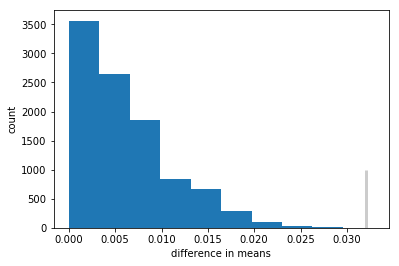

In [33]:
import matplotlib.pyplot as plt
test_stats = np.array([teststatistic(RunModel()) for i in range(10000)])
test_stats.shape
plt.vlines(actual, 0, 1000, linewidth=3, color='0.8')
plt.hist(test_stats)
plt.xlabel('difference in means')
plt.ylabel('count')
plt.show()
None

**Step4:** To calculate the p-value of getting diff in means as extreme as actual or more than actual.

**Compute margin of error, confidence interval, and p-value.**

In [36]:
conf_int = np.percentile(test_stats, [2.5, 97.5])
print(conf_int)

[ 0.          0.01724846]


In [37]:
marginoferror = 2 * test_stats.std()
print(marginoferror)

0.00950525980443


In [38]:
p_value = sum(test_stats >= actual)/len(test_stats)
print(p_value)

0.0001


The p-value of null hypothesis being true is .01%. Which means that only 0.01% times the difference in means can be equal to or more than the actual difference in mean observed. This is very low probability of something happening which suggests that it can not be just due to chance. Therefore, we can reject the null hypothesis and consider the alternate hypothesis. 

**Conclusion: There is an impact of race on the callbacks of the employers.**

**Write a story describing the statistical significance in the context or the original problem.**

Racial discrimination in the job market is pervasive in cultures throughout the world. Here, we examine the racial discrimation by examining the impact on callbacks from the employers based on the assigning identical resume to to the employers. 

To check if there is a significance difference in the black and white people callbacks from the employers, we employed two sample significance test. The null hypothesis assumed here is that there is no difference in the means of the blacks and white people callbacks. The experiment was simulated 10000 and sampling distribution for difference in sample means was made. Then the probability of finding the actual observed difference in such a distribution was observed. It was found that the probability of  finding the actual difference is 0.01% which suggests that only 0.01% times the difference in means can be equal to or more than the actual difference in mean observed. This is very low probability of something happening which suggests that it can not be just due to chance. Therefore, we can reject the null hypothesis and consider the alternate hypothesis. 

Therefore the difference in the callbacks from employers is probably due to Race. 

**Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?**

The data analysis performed here suggest that race is one of the factors which influences the callback success for an employee. As described above that the probability of finding the actual difference is 0.01% which suggests that only 0.01% times the difference in means can be equal to or more than the actual difference in mean observed. This is very low probability of something happening which suggests that it can not be just due to chance. Therefore, we can reject the null hypothesis and consider the alternate hypothesis.

However, this does not mean that Race is the MOST IMPORTANT factor. To find out which factor could be most inportant factor, we need to change one factor at a time and see how much is the margin of error with each of the factors. If the margin of error is low then that would mean that it is most important factor to determine the callbacks.
